# Lab 2: Exploratory data analysis

In this lab, we are going to be exploring the data in the Open Exo Catalogue dataset (from kaggle.com).  

## Reading Data
First we use pd.read.csv to read in the data

In [2]:
import numpy as np
import pandas as pd

myfile = 'oec.csv'

#read data from a csv file
df = pd.read_csv(myfile,index_col=None)

#display the 'head' of the data
df.head()

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,...,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
0,HD 143761 b,0,1.0450,NaN,39.845800,0.2196,0.037,270.6,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
1,HD 143761 c,0,0.0790,NaN,102.540000,0.4123,0.050,190.0,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
2,KOI-1843.03,0,0.0014,0.054,0.176891,0.0048,NaN,NaN,NaN,NaN,...,13/07/15,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
3,KOI-1843.01,0,NaN,0.114,4.194525,0.0390,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
4,KOI-1843.02,0,NaN,0.071,6.356006,0.0520,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial


We use df['RadiusJpt'].head(20) to display the first 20 values in column RadiusJpt

In [10]:
df['RadiusJpt'].head(20)

0     0.05400
1     0.11400
2     0.07100
3     0.84000
4     0.82000
5     0.14700
6         NaN
7     0.19200
8     1.24000
9         NaN
10        NaN
11    0.17200
12    0.25600
13    1.67000
14    0.25250
15    0.26610
16    0.23056
17        NaN
18        NaN
19        NaN
Name: RadiusJpt, dtype: float64

Since this column contains NaN entries we must use np.nanmean, np.nanmin, etc. when computing these statistical quantities.

## Summarising Numeric Data
The numpy library is really useful for this.  Here is an example of how we might use it to find a mean.

In [4]:
value_list=[3.14, 1.59, 2.65, 3.59]
meanvalue=np.mean(value_list)
print("The mean is {}".format(meanvalue))

The mean is 2.7425


## Remark
However if we apply *np.mean()* to *df['RadiusJpt']* - we obtain:

In [6]:
radius_array=np.array(df['RadiusJpt']).astype(float)
meanvalue=np.mean(radius_array)
print("The mean is {}".format(meanvalue))

The mean is nan


As mentioned above we must use np.nanmean, etc

## Exercise 1
Use numpy to calculate the mean, median, min, max, standard deviation, range and interquartile range for the *RadiusJpt* column. 

In [8]:
radius_array=np.array(df['RadiusJpt']).astype(float)
mean=np.nanmean(radius_array)
median=np.nanpercentile(radius_array,50)
min_value=np.nanmin(radius_array)
max_value=np.nanmax(radius_array)
std=np.nanstd(radius_array)
range_value=max_value-min_value
lq=np.nanpercentile(radius_array,25)
uq=np.nanpercentile(radius_array,75)
iqr=uq-lq
print("Mean: {}\nMedian: {}\nMin: {}\nMax:{}\nStandard deviation:{}\nRange: {}\nIQR: {}\n".format(mean,median,min_value,max_value,std,range_value,iqr))

Mean: 0.3474223117977154
Median: 0.20549499999999998
Min: 0.0023
Max:6.0
Standard deviation:0.3910543789591339
Range: 5.9977
IQR: 0.16099999999999998



## Exercise 2 (advanced)
In the lecture we discussed different definitions for some of the summary statistics used here.  For example, some definitions of standard deviation divide by *n* and some divide by *n-1*.  Median may or may not do something different for even and odd length lists.  By implementing your own functions for these definitions, investigate what definition is used by the numpy library routines for standard deviation and median. (see Topic 2 lecture notes for reference).

## Boxplots
These are a good way of visualising numeric data.

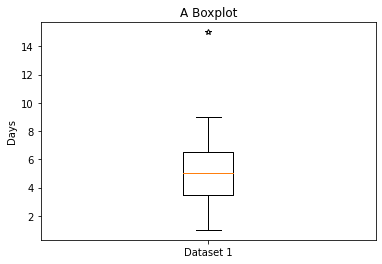

In [7]:
#you can use pyplot in matplotlib
import matplotlib.pyplot as plt

mydata=[3,7,2,5,6,4,5,9,5,1,15]
datasets={"Dataset 1":mydata}
plt.boxplot(list(datasets.values()),sym='*',whis=1.5)
plt.ylabel("Days")
plt.xticks(range(1,len(datasets)+1),datasets.keys())
plt.title("A Boxplot")
plt.show()


[Text(0.5, 0, 'My Data')]

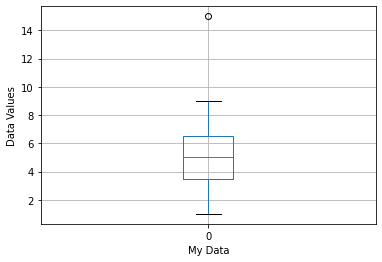

In [10]:
#or you can use PANDAS
df2 = pd.DataFrame(mydata)
ax=df2.boxplot()
ax.set(ylabel='Data Values');
ax.set(xlabel='My Data')

## Filterning out NaN values
Since pyplot does not deal with NaN values in order to obtain a boxplot of the data in RadiusJpt that is stored in radius_array we would first need to filter out the NaN values using np.isnan()   

In [5]:
filtered_radius_array = radius_array[~np.isnan(radius_array)]
%matplotlib inline  
#this may be needed depending on your version / configuration to make the plots display inline
from matplotlib import pyplot as plt

plt.boxplot([filtered_radius_array],sym='*',whis=1.5)
plt.show()

NameError: name 'radius_array' is not defined

Alternatively we can use PANDAS which automatically deals with NaN values

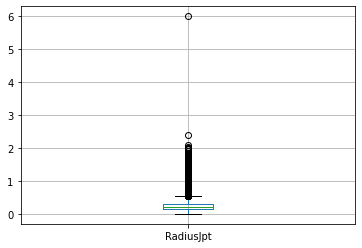

In [12]:
ax=df.boxplot(['RadiusJpt'])

sym and *whis* are examples of optional, named arguments to a function.  We can call plt.boxplot() without these arguments provided we supply the first unnamed argument which is the data.  In this case the function uses default values for these arguments (which were defined in the function definition).

## Exercise 3a
Modify the boxplot obtained using pyplot to include informative labels and gridlines (see the lecture notes).  Play with the arguments to see how the appearance changes.  

In [3]:
boxplotset={"radiusJpt":filtered_radius_array}
# fig,ax1=plt.subplots(figsize=(4,6))
# ax1.yaxis.grid(True,linestyle='-')
# plt.boxplot(list(boxplotset.values()),sym='+',whis=1.5)
# # plt.ylabel('Value')
# # plt.xlabel('Dataset')
# plt.xticks(range(1,len(boxplotset)+1),boxplotset.keys())
# # plt.title('Boxplot')
plt.show()

NameError: name 'filtered_radius_array' is not defined

## Histogram
We can a plot a histogram on the RadiusJpt values

Text(0.5, 0, 'radiusJpt')

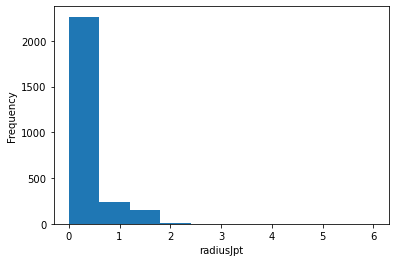

In [26]:
boxplotset7={"radiusJpt":filtered_radius_array}
plt.hist(list(boxplotset7.values()))
plt.ylabel('Frequency')
plt.xlabel('radiusJpt')

## Exercise 3b

Try rescaling the boxplot in Exercise 3a using plt.ylim().  Also try rescaling your numbers (e.g., on a log scale using the np.log10() function) and plotting these.

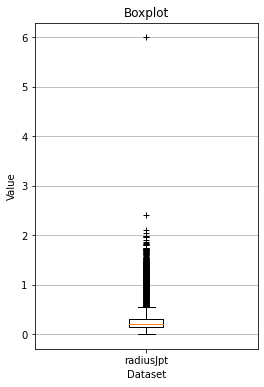

In [15]:
log_radius_array=np.array([np.log10(x) for x in radius_array])

boxplotset={"radiusJpt":filtered_radius_array}
fig,ax1=plt.subplots(figsize=(4,6))
ax1.yaxis.grid(True,linestyle='-',)
plt.boxplot(list(boxplotset.values()),sym='+',whis=1.5)
#plt.ylim(-3,3)
plt.ylabel('Value')
plt.xlabel('Dataset')
plt.xticks(range(1,len(boxplotset)+1),boxplotset.keys())
plt.title('Boxplot')
plt.show()


## Exercise 3c
First create a numpy array from the HostStarRadiusSlrRad column of the dataset.
Then create a filtered version of this array by filtering out the NaN values.
Display boxplots of *RadiusJpt* with *HostStarRadiusSlrRad* side-by-side.  


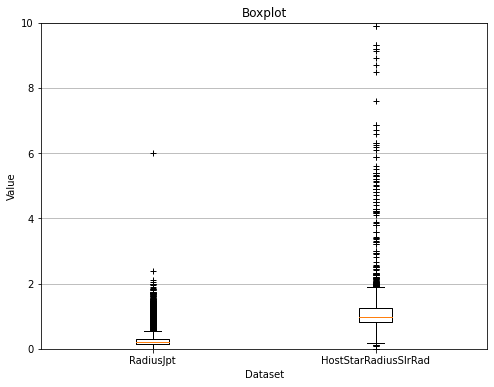

In [25]:
host_star_radius_array=np.array(df['HostStarRadiusSlrRad']).astype(float)
filtered_host_star_radius_array = host_star_radius_array[~np.isnan(host_star_radius_array)]
boxplotset={"RadiusJpt":filtered_radius_array,"HostStarRadiusSlrRad":filtered_host_star_radius_array}
fig,ax1=plt.subplots(figsize=(8,6))
ax1.yaxis.grid(True,linestyle='-',)
plt.boxplot(list(boxplotset.values()),sym='+',whis=1.5)
plt.ylabel('Value')
plt.xlabel('Dataset')
plt.ylim(0,10)
plt.xticks(range(1,len(boxplotset)+1),boxplotset.keys())
plt.title('Boxplot')
plt.show()

## Exercise 3d (advanced)
Write a function called **drawboxplot()** which has one positional / compulsory argument, which is a dictionary containing named datasets (e.g., **boxplotset**).  It should also have a number of optional named arguments which can be used to set style/display parameters but have defaults otherwise.

## Bar charts
The code below will draw a bar chart for dictionary data.

In [5]:
demodata={"Mon":156,"Tues":45,"Wed":67,"Thurs":19,"Fri":89,"Sat":50,"Sun":0}
xs =range(0,len(demodata))
plt.bar(xs,demodata.values())
plt.xticks(xs,demodata.keys())
plt.xlabel("Day")
plt.ylabel("Frequency")
plt.title("Sales per Day")
plt.show()

NameError: name 'plt' is not defined

Sometimes it is necessary to make the xticklabels smaller so that they are readable.  To do this we can modify the code as follows:

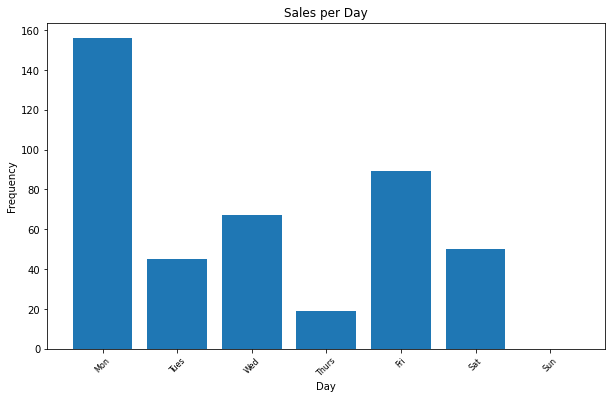

In [19]:
demodata={"Mon":156,"Tues":45,"Wed":67,"Thurs":19,"Fri":89,"Sat":50,"Sun":0}
xs =range(0,len(demodata))
fig,ax1=plt.subplots(figsize=(10,6))
plt.bar(xs,demodata.values())
plt.xticks(xs,demodata.keys())
xtickNames=plt.setp(ax1,xticklabels=demodata.keys())
plt.setp(xtickNames,rotation=45,fontsize=8)
plt.xlabel("Day")
plt.ylabel("Frequency")
plt.title("Sales per Day")
plt.show()

## Exercise 4a
Modify the above bar chart code so that the fontsize/rotation depends on the longest key value.

## Exercise 4b
Write a function that will take a discrete / categorical variable and return a frequency distribution as a dictionary

In [20]:
def make_frequency_dict(anylist):
    frequency_dict={}
    for myitem in anylist:
        frequency_dict[myitem]=frequency_dict.get(myitem,0)+1
    return frequency_dict

## Exercise 4d
Use your function from 4b to make frequency distributions for 'TypeFlag" and 'DiscoveryYear'.  Display them as barcharts

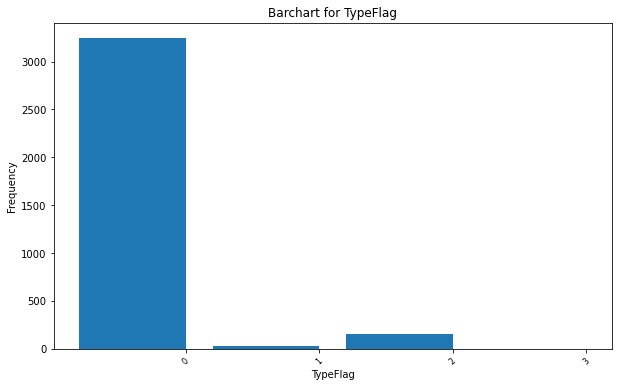

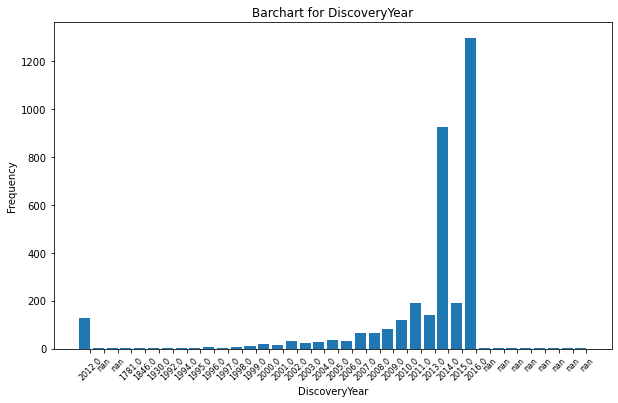

In [21]:
type_flag_dict=make_frequency_dict(df['TypeFlag'])
year_dict=make_frequency_dict(df['DiscoveryYear'])

def displaybar(demodata,xlabel='',ylabel='Frequency',title=''):

    xs =range(0,len(demodata))
    sortedkeys=sorted(demodata.keys())
    fig,ax1=plt.subplots(figsize=(10,6))
    plt.bar([x-0.4 for x in xs],[demodata[key] for key in sortedkeys])
    plt.xticks(xs,sortedkeys)
    xtickNames=plt.setp(ax1,xticklabels=sortedkeys)
    plt.setp(xtickNames,rotation=45,fontsize=8)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    if title=='':
        title="Barchart"
        if xlabel=='':
            pass
        else:
            title+=" for "+xlabel
    plt.title(title)
    plt.show()
    
displaybar(type_flag_dict,xlabel='TypeFlag')
displaybar(year_dict,xlabel='DiscoveryYear')



## Scatterplots
For paired data we can construct scatterplots and compute correlation coefficients using the following code:


In [4]:
import scipy.stats as stats

x_array=np.array([3.14, 1.59, 2.65, 3.59])
y_array=np.array([2.71, 8.28, 1.82, 8.45])

pearsoncc=stats.pearsonr(x_array,y_array)

print("Pearson's correlation coefficient is {}".format(pearsoncc))

spearmanr=stats.spearmanr(x_array,y_array)
print("Spearman's correlation coefficient is {}".format(spearmanr))

plt.scatter(x_array,y_array)
plt.show()

Pearson's correlation coefficient is (-0.16137275320135408, 0.838627246798646)
Spearman's correlation coefficient is SpearmanrResult(correlation=0.39999999999999997, pvalue=0.6)


NameError: name 'plt' is not defined

## Exercise 5a
Unfortunately, you cannot just apply this code to arrays constructed for each individual variable in the df.   (Why not?)
Bearing this in mind, compute correlation coefficients and construct a scatterplot comparing RadiusJpt and PlanetaryMassJpt. Label the axes and put gridlines on.

3584
3584
Pearson's correlation coefficient is (-0.16137275320135408, 0.838627246798646)
Spearman's correlation coefficient is SpearmanrResult(correlation=0.39999999999999997, pvalue=0.6)


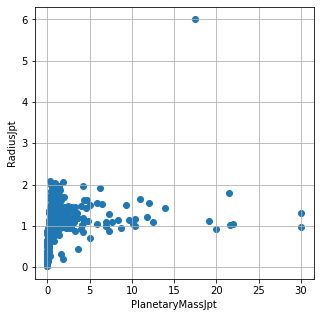

In [12]:
def make_scatter(alist,blist,xlabel='',ylabel=''):
    
    xs=[]
    ys=[]
    for a,b in zip(alist,blist):
        try:
            x=float(a)
            y=float(b)
            xs.append(x)
            ys.append(y)
        except:
            pass
            
    xarray=np.array(xs)
    yarray=np.array(ys)
    print(len(xarray))
    print(len(yarray))
    pearsoncc=stats.pearsonr(x_array,y_array)

    print("Pearson's correlation coefficient is {}".format(pearsoncc))

    spearmanr=stats.spearmanr(x_array,y_array)
    print("Spearman's correlation coefficient is {}".format(spearmanr))

    fig,ax1=plt.subplots(figsize=(5,5))
    ax1.yaxis.grid(True,linestyle='-')
    ax1.xaxis.grid(True,linestyle='-')
    plt.scatter(xarray,yarray)
#     print(xarray)
#     print(yarray)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
#     plt.xlim(0,35)
#     plt.ylim(0,7)
    plt.show()
    
xvar='PlanetaryMassJpt'
yvar='RadiusJpt'
make_scatter(df[xvar],df[yvar],xlabel=xvar,ylabel=yvar)
    

## Extension: Date formats
The datetime library can be used to handle dates (and times).   For example:

In [52]:
from datetime import datetime
dateobjs=[]
for mydate in df['LastUpdated']:
    try:
        dateobj=datetime.strptime(mydate,'%y/%m/%d')
        dateobjs.append(dateobj)
    except:
        pass
#print(dateobjs)
first=datetime.max
last=datetime.min

for adate in dateobjs:
    if adate<first:
        first=adate
    if adate>last:
        last=adate
        
print("Earliest date is {}".format(datetime.strftime(first,'%d/%m/%y')))
print('Latest date is {}'.format(datetime.strftime(last,'%d/%m/%y')))
print(last-first)
    

Earliest date is 12/04/06
Latest date is 19/07/16
3751 days, 0:00:00


## Exercise 6 (advanced)
Draw barcharts showing the distribution of updates according to each of day, month and year.  Using your barcharts you should be able to comment on which year most updates were made in, which month is most popular for making updates and which date in the month is most popular for making updates.


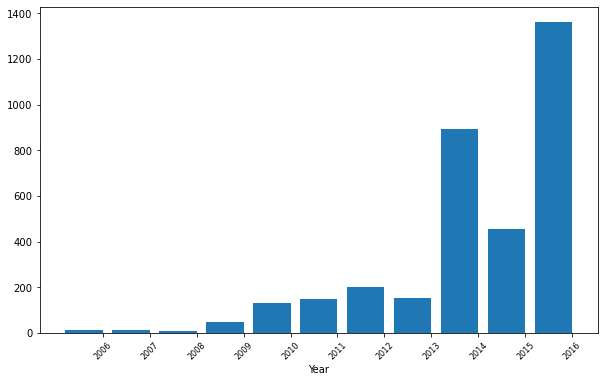

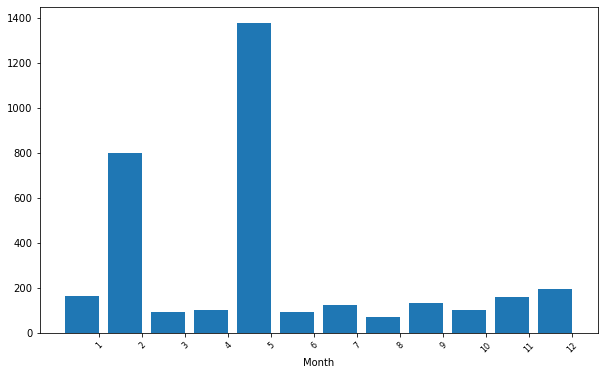

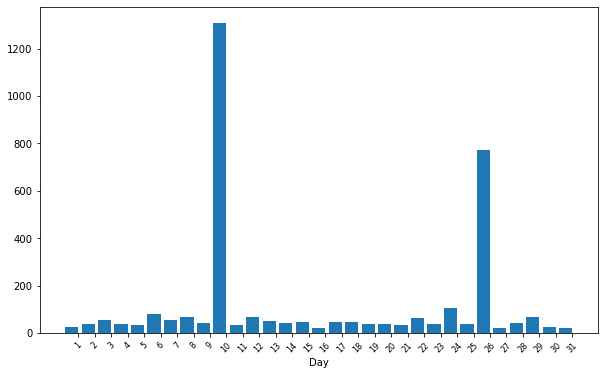

In [48]:
updated_year={}
updated_month={}
updated_day={}
for mydate in dateobjs:
    y=mydate.year
    m=mydate.month
    d=mydate.day
    updated_year[y]=updated_year.get(y,0)+1
    updated_month[m]=updated_month.get(m,0)+1
    updated_day[d]=updated_day.get(d,0)+1

def plotbar(adict,xlabel=''):    
    sortedkeys=sorted(adict.keys())
    xs=range(0,len(adict))
    fig, ax1 = plt.subplots(figsize=(10, 6))
    plt.bar([x-0.4 for x in xs],[adict[key] for key in sortedkeys])
    plt.xticks(xs,sortedkeys)
    xtickNames=plt.setp(ax1,xticklabels=sortedkeys)
    plt.setp(xtickNames,rotation=45,fontsize=8)
    plt.xlabel(xlabel)
    plt.show()

plotbar(updated_year,'Year')
plotbar(updated_month,'Month')
plotbar(updated_day,'Day')